In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
salary  = pd.read_csv('Salary_Data.csv')
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [4]:
salary.shape

(30, 2)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

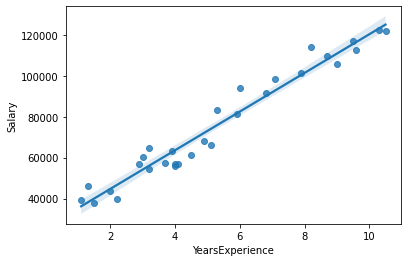

In [5]:
sns.regplot(x=salary['YearsExperience'], y = salary['Salary'])

In [6]:
X =salary[['YearsExperience']]
y = salary['Salary']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.1,random_state= 1)

In [7]:
model1 = LinearRegression()
model1.fit(X_train,y_train)

LinearRegression()

In [8]:
pred1 = model1.predict(X_test)

In [9]:
pred1

array([75389.2962963 , 92329.11079971, 62213.88501586])

In [11]:
print(model1.coef_)

[9411.00805745]


In [12]:
print(r2_score(y_test,pred1))

0.8453155338321459


In [14]:
print('MAE',mean_absolute_error(y_test,pred1))

MAE 4882.235962709953


In [15]:
print('MSE',mean_squared_error(y_test,pred1))

MSE 31869368.148030903


In [16]:
print('RMSE',np.sqrt(mean_squared_error(y_test,pred1)))

RMSE 5645.296108091311


In [23]:
gdp = pd.read_csv('RealGDP30032022.csv')

In [24]:
gdp.reset_index(inplace=True)
gdp.head()

,index,tyear,Period,Agriculture,CropProduction,Livestock,Forestry,Fishing,Industry,MiningAndQuarrying,...,AdministrativeAndSupportServicesBusinessServices,PublicAdministration,Education,HumanHealthAndSocialServices,OtherServices,TOTAL_GDP,TotalGDPatConstantBasicPrices,NonOilGDPatConstantBasicPrices,NetIndirectTaxesOnProducts,TotalGDPatConstantMarketPrices
0,1981,Annual,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,NaN,4977416.70,...,807075.54,242555.85,110697.65,132700.20,15258004.34,NaN,NaN,NaN,NaN,NaN
1,1982,Annual,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,NaN,4453093.63,...,825921.69,248219.81,113282.57,133767.58,14985078.32,NaN,NaN,NaN,NaN,NaN
2,1983,Annual,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,NaN,4052977.68,...,844767.84,253883.77,115867.49,125819.69,13849725.17,NaN,NaN,NaN,NaN,NaN
3,1984,Annual,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,NaN,4559196.21,...,863613.99,259547.73,118452.41,103092.67,13779255.49,NaN,NaN,NaN,NaN,NaN
4,1985,Annual,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,NaN,4918272.50,...,882460.14,265211.69,121037.33,98790.30,14953913.05,NaN,NaN,NaN,NaN,NaN


In [25]:
gdp.rename({'index':'tyear', 'tyear':'Period', 'Period':'Agriculture', 'Agriculture':'CropPro', 'CropProduction':'Livestock',
       'Livestock':'Forestry', 'Forestry':'Fishing', 'Fishing':'Industry', 'Industry':'Mining', 'MiningAndQuarrying':'Crudeoil',
       'CrudePetroleumAndNaturalGas':'SolidMinerals', 'SolidMinerals':'CoalMining', 'CoalMining':'MetalOres',
       'MetalOres':'Quarrying', 'QuarryingAndOtherMinerals':'Manufacturing', 'Manufacturing':'Electrcity',
       'ElectricityGasSteamAndAirCon':'Watersupply', 'WaterSupplySewageWaste':'Construction',
       'Construction':'Services', 'Services':'Trade', 'Trade':'Accomondation', 'AccommodationAndFoodServices':'Transport',
       'Transport':'ICT', 'InformationAndCommunication':'Utilities', 'Utilities':'Entertainment',
       'ArtsEntertainmentAndRecreation':'FININS', 'FinanceAndInsurance':'RealEstate', 'RealEstate':'ProTech',
       'ProfessionalScientificAndTechnicalServices':'BusinessService',
       'AdministrativeAndSupportServicesBusinessServices':'PublicAdmin',
       'PublicAdministration':'Education', 'Education':'HealthService', 'HumanHealthAndSocialServices':'OtherServices',
       'OtherServices':'TOTAL_GDP', 'TOTAL_GDP':'TotalGDPatConstantBasicPrices', 'TotalGDPatConstantBasicPrices':'NonOilGDPatConstantBasicPrices',
       'NonOilGDPatConstantBasicPrices':'NetIndirectTaxesOnProducts', 'NetIndirectTaxesOnProducts':'TotalGDPatConstantMarketPrices',
       },axis =1,inplace =True)

In [26]:
gdp.isnull().sum()

tyear                              0
Period                             0
Agriculture                        0
CropPro                            0
Livestock                          0
Forestry                           0
Fishing                            0
Industry                           0
Mining                            77
Crudeoil                           0
SolidMinerals                      0
CoalMining                        77
MetalOres                         77
Quarrying                         77
Manufacturing                      0
Electrcity                        77
Watersupply                       77
Construction                       0
Services                           0
Trade                              0
Accomondation                      0
Transport                          0
ICT                                0
Utilities                          0
Entertainment                      0
FININS                             0
RealEstate                         0
P

In [27]:
gdp.drop(['Mining','CoalMining','MetalOres','Quarrying','Electrcity','Watersupply','TotalGDPatConstantBasicPrices','NonOilGDPatConstantBasicPrices','NetIndirectTaxesOnProducts', 'TotalGDPatConstantMarketPrices','TotalGDPatConstantMarketPrices'],axis  = 1, inplace=True)

In [29]:
gdp2 = gdp[gdp['Period'] == 'Annual']
gdp2.head()

,tyear,Period,Agriculture,CropPro,Livestock,Forestry,Fishing,Industry,Crudeoil,SolidMinerals,...,Entertainment,FININS,RealEstate,ProTech,BusinessService,PublicAdmin,Education,HealthService,OtherServices,TOTAL_GDP
0,1981,Annual,2364373.15,1854764.44,341411.50,77897.99,90299.23,6603250.12,4977416.70,67136.73,...,4561.07,282170.74,1063959.81,421381.98,3234.81,807075.54,242555.85,110697.65,132700.20,15258004.34
1,1982,Annual,2425960.89,1897078.85,361115.70,73910.25,93856.08,6272828.03,4453093.63,54840.50,...,4597.76,372267.76,1074049.33,423670.54,3252.38,825921.69,248219.81,113282.57,133767.58,14985078.32
2,1983,Annual,2409081.92,1842704.31,393131.01,75282.78,97963.82,5264881.39,4052977.68,44014.84,...,4324.58,336896.50,1086703.98,481170.73,3693.79,844767.84,253883.77,115867.49,125819.69,13849725.17
3,1984,Annual,2303505.42,1759115.15,399685.38,76694.14,68010.74,5621181.44,4559196.21,43078.37,...,3543.43,267287.62,1086931.99,518359.90,3979.28,863613.99,259547.73,118452.41,103092.67,13779255.49
4,1985,Annual,2731062.47,2180907.71,428102.85,78082.45,43969.46,6379599.38,4918272.50,44539.09,...,3395.55,254993.44,1091378.22,602464.66,4624.92,882460.14,265211.69,121037.33,98790.30,14953913.05


In [30]:
gdp2.drop(['tyear','Period'],axis=1,inplace= True)

C:\Users\HP\AppData\Local\Temp\ipykernel_2204\2420079530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp2.drop(['tyear','Period'],axis=1,inplace= True)


In [31]:
X = gdp2.drop('TOTAL_GDP',axis = 1)
y= gdp2['TOTAL_GDP']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state = 1)

In [32]:
model2 = LinearRegression()
model2.fit(X_train,y_train)

LinearRegression()

In [33]:
pred2 = model2.predict(X_test)
pred2

array([13849725.18561945, 54612264.15385722, 13779255.50797706,
       31709447.37837635])

In [35]:
print(r2_score(y_test,pred2))

1.0


In [36]:
coef = pd.DataFrame(data = model2.coef_, index = X.columns, columns = ['Coefficient'])

coef

,Coefficient
Agriculture,0.550759
CropPro,0.449241
Livestock,0.449242
Forestry,0.449242
Fishing,0.449241
Industry,0.971007
Crudeoil,0.028993
SolidMinerals,0.028993
Manufacturing,0.028993
Construction,1.000000


In [37]:

print(mean_absolute_error(y_test,pred2))

0.01784073607996106


In [38]:
print(mean_squared_error(y_test,pred2))

0.00034642402711938195


In [39]:
print(np.sqrt(mean_squared_error(y_test,pred2)))

0.018612469667386486
